# 变量含义
1. CRIM – 城镇犯罪率
- 每个城镇的犯罪率。
2. ZN – 住宅用地的比例
- 住宅用地面积大于 25,000 平方英尺的比例。
3. INDUS – 非零售商业用地比例
- 每个城镇中非零售商业用地的比例。
4. CHAS – 查尔斯河虚拟变量
- 是否位于查尔斯河附近。如果是，值为 1，否则为 0。
5. NOX – 氮氧化物浓度
- 每一英里每百万空气的氮氧化物浓度。
6. RM – 每个住宅的房间数
- 每个住宅的平均房间数。
7. AGE – 房屋建成年代
- 1940 年之前建造的房屋比例。
8. DIS – 到波士顿五个中心区域的加权距离
- 通过一个加权距离的计算，表示到波士顿五个就业中心的距离。
9. RAD – 公路的接近性
- 距离主要公路的接近度，数值越大表示接近程度越高。
10. TAX – 房产税率
- 每一万美元的房产税率。
11. PTRATIO – 学生与教师的比例
- 每个城镇的学生和教师比例。
12. B – 非洲裔美国人比例
- 该城镇中非洲裔美国人居民比例的计算公式为:
    - $B = 1000×(ratio of Black residents−0.63)^2$
13. LSTAT – 低收入人群比例
- 低收入家庭在该地区的比例。
14. MEDV – 中位房价（目标变量）
- 房价的中位数，单位是千美元。这个特征是我们需要预测的目标值。

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os
warnings.filterwarnings('ignore')
%matplotlib inline
plt.style.use('fivethirtyeight')

RANDOM_SEED = 42

In [6]:
data_path = './data'
data = pd.read_csv(os.path.join(data_path, 'HousingData.csv'))
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [7]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,486.000000,486.000000,486.000000,486.000000,506.000000,506.000000,486.000000,506.000000,506.000000,506.000000,506.000000,506.000000,486.000000,506.000000
mean,3.611874,11.211934,11.083992,0.069959,0.554695,6.284634,68.518519,3.795043,9.549407,408.237154,18.455534,356.674032,12.715432,22.532806
std,8.720192,23.388876,6.835896,0.255340,0.115878,0.702617,27.999513,2.105710,8.707259,168.537116,2.164946,91.294864,7.155871,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.081900,0.000000,5.190000,0.000000,0.449000,5.885500,45.175000,2.100175,4.000000,279.000000,17.400000,375.377500,7.125000,17.025000
50%,0.253715,0.000000,9.690000,0.000000,0.538000,6.208500,76.800000,3.207450,5.000000,330.000000,19.050000,391.440000,11.430000,21.200000
75%,3.560263,12.500000,18.100000,0.000000,0.624000,6.623500,93.975000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [ ]:
data.isna().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

# EDA

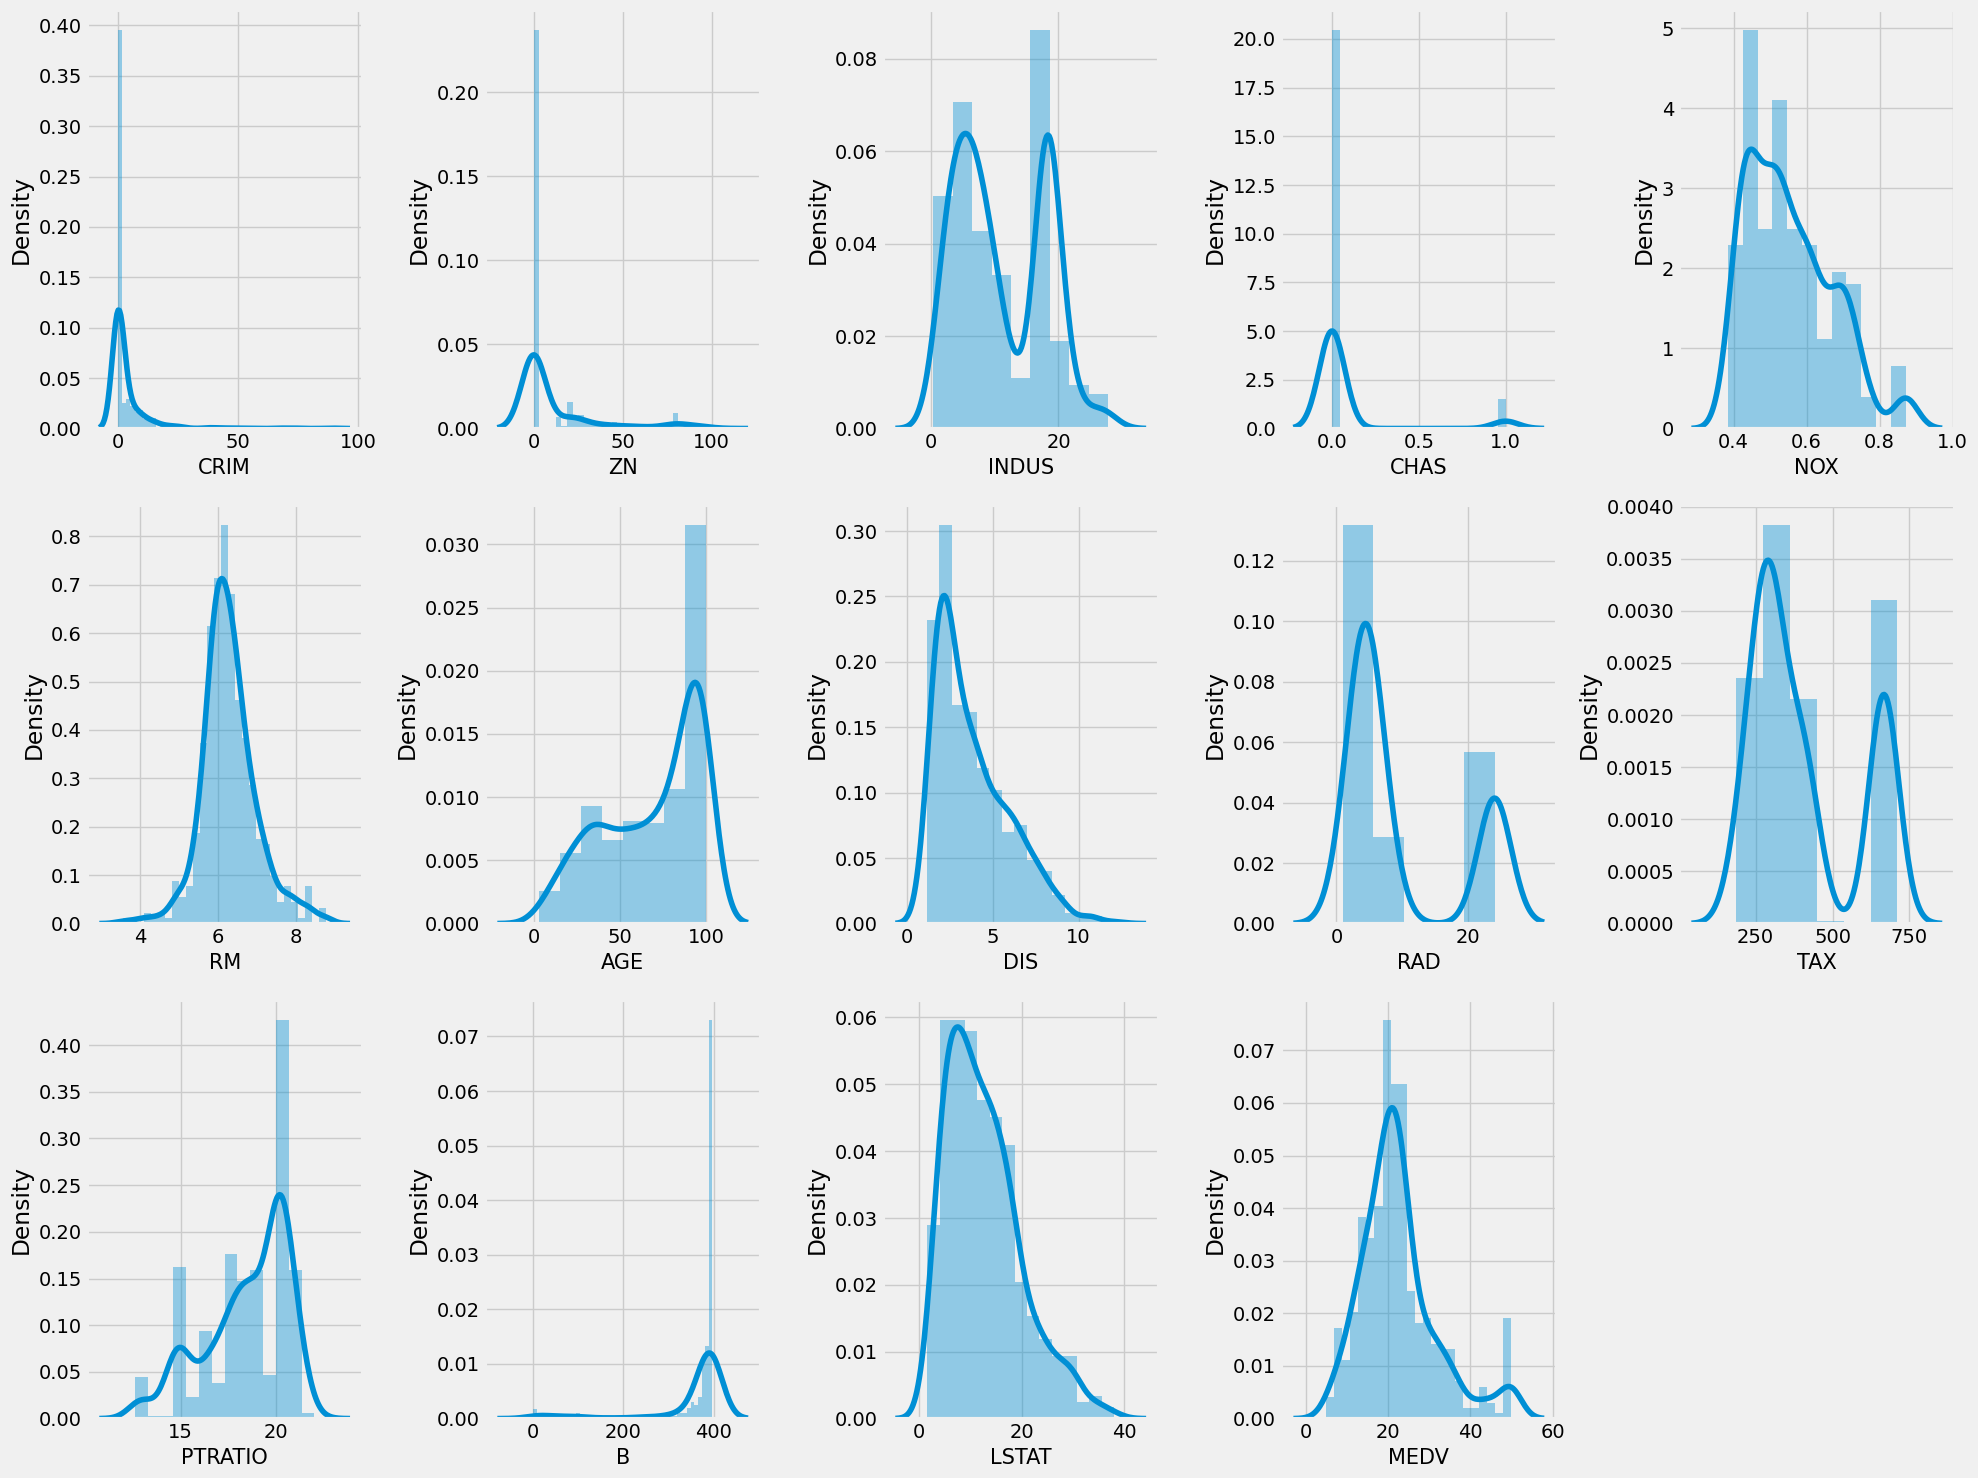

In [23]:
plt.figure(figsize = (20, 15))
for i, column in enumerate(data):
    ax = plt.subplot(3, 5, i + 1)
    sns.distplot(data[column])
    plt.xlabel(column, fontsize = 15)

plt.tight_layout()
plt.show()

DIS右偏，log变换？

<Axes: >

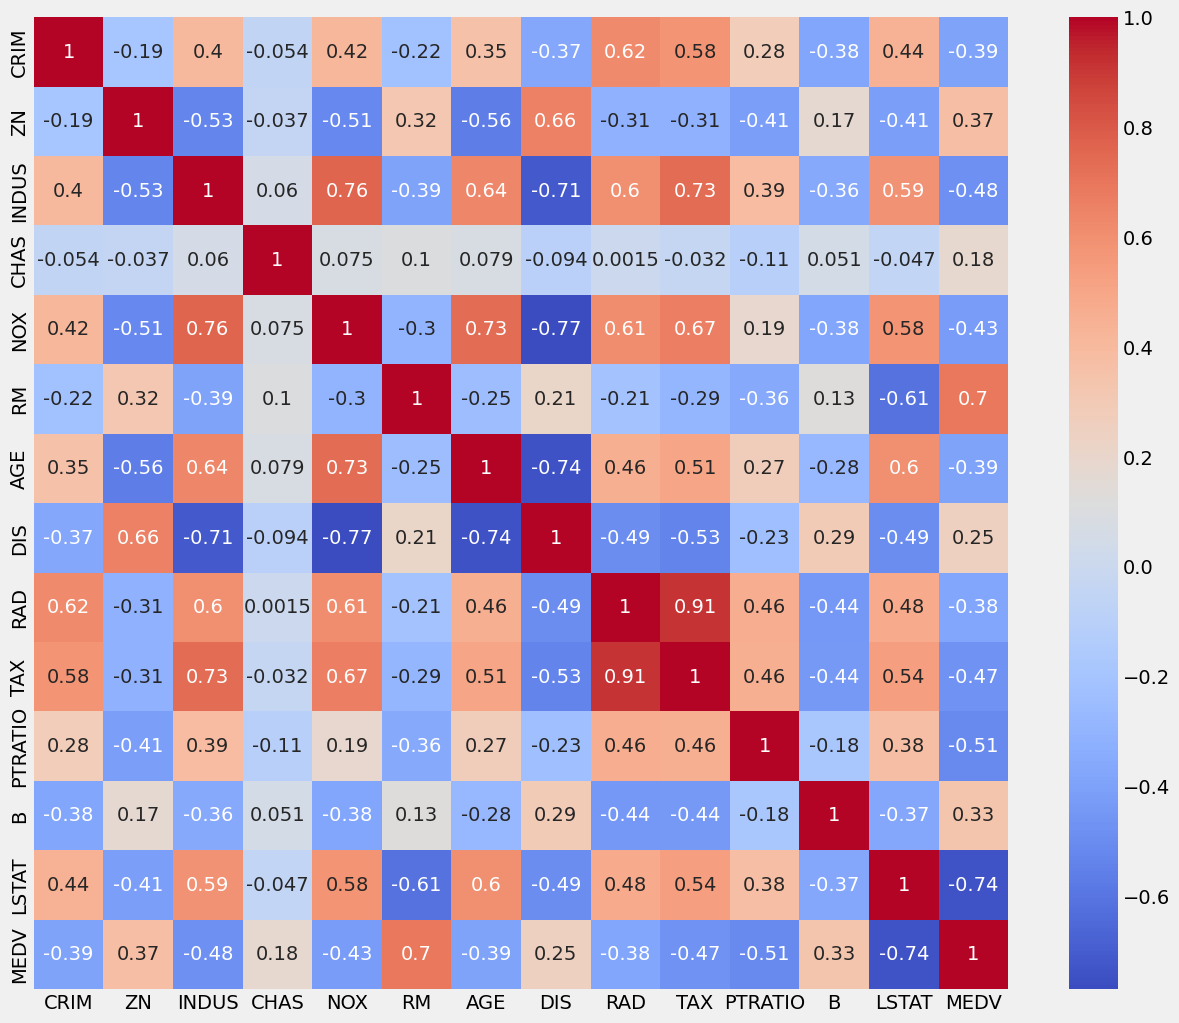

In [30]:
plt.figure(figsize=(14,12))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')

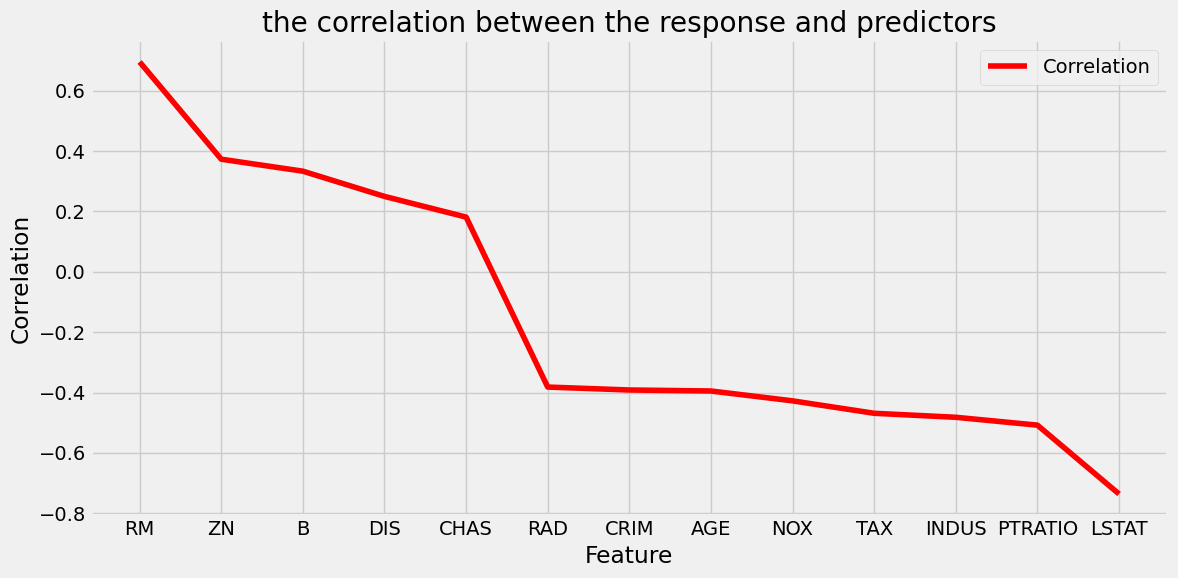

In [38]:
plt.figure(figsize=(12,6))
plt.plot(data.corr()["MEDV"].sort_values(ascending=False)[1:],label="Correlation",color="red")
plt.ylabel("Correlation")
plt.xlabel("Feature")
plt.title("the correlation between the response and predictors")
plt.legend()
plt.tight_layout()
plt.grid(True)
plt.show()

RM相关性最高

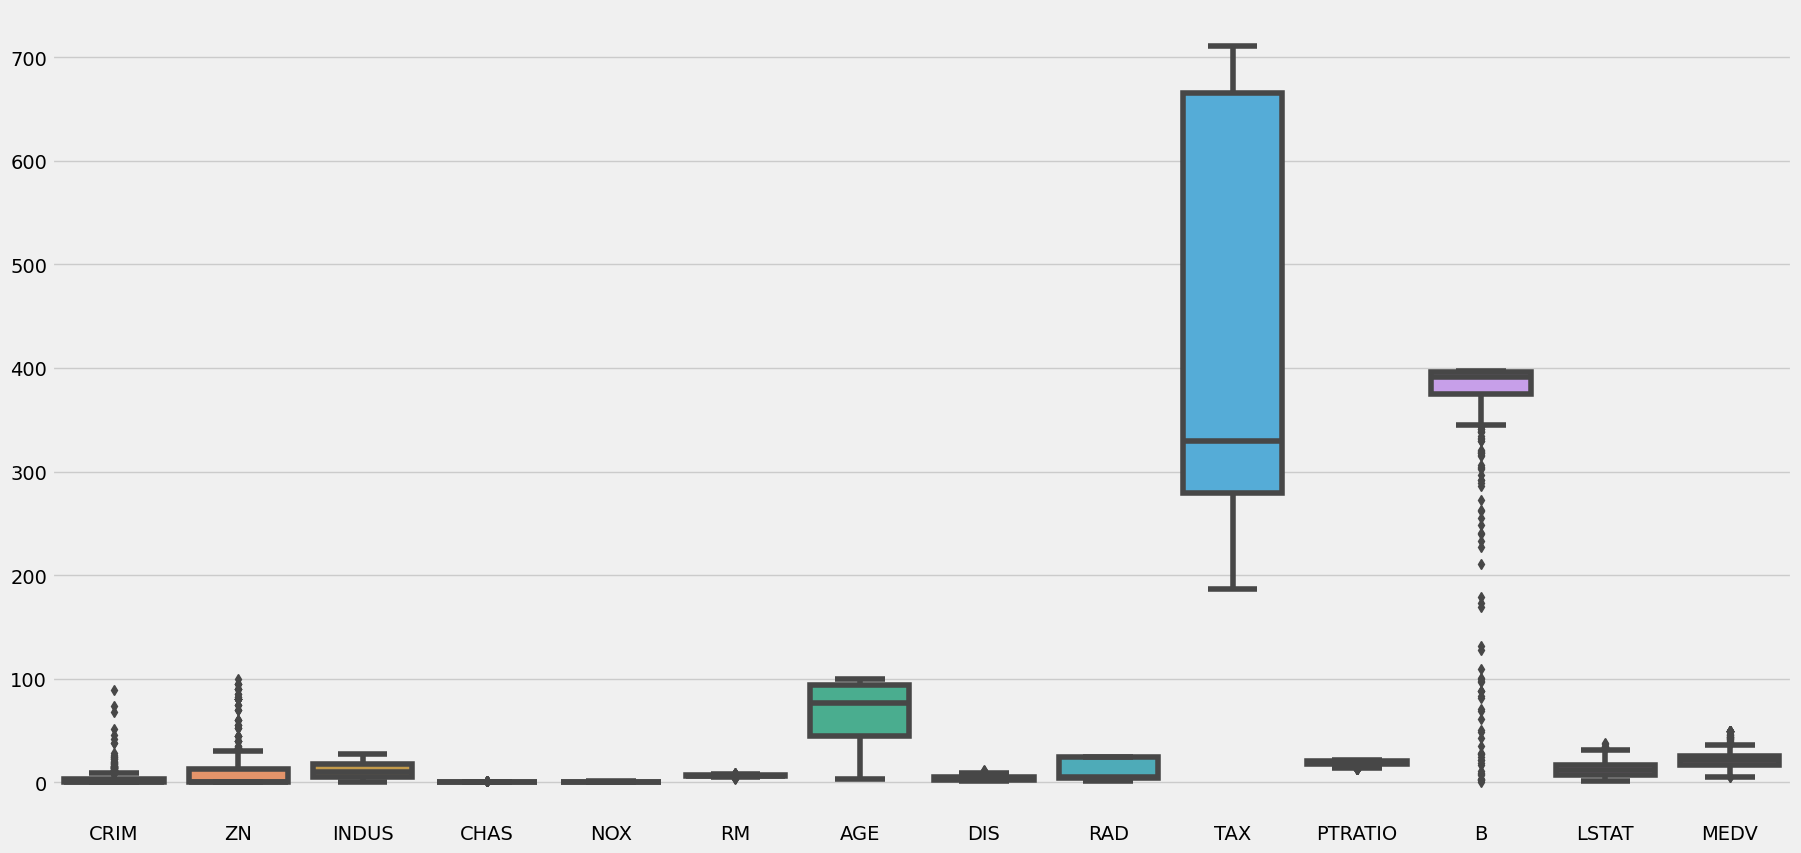

In [25]:
plt.figure(figsize=(20, 10))
sns.boxplot(data, width = 0.8)
plt.show()

需要标准化

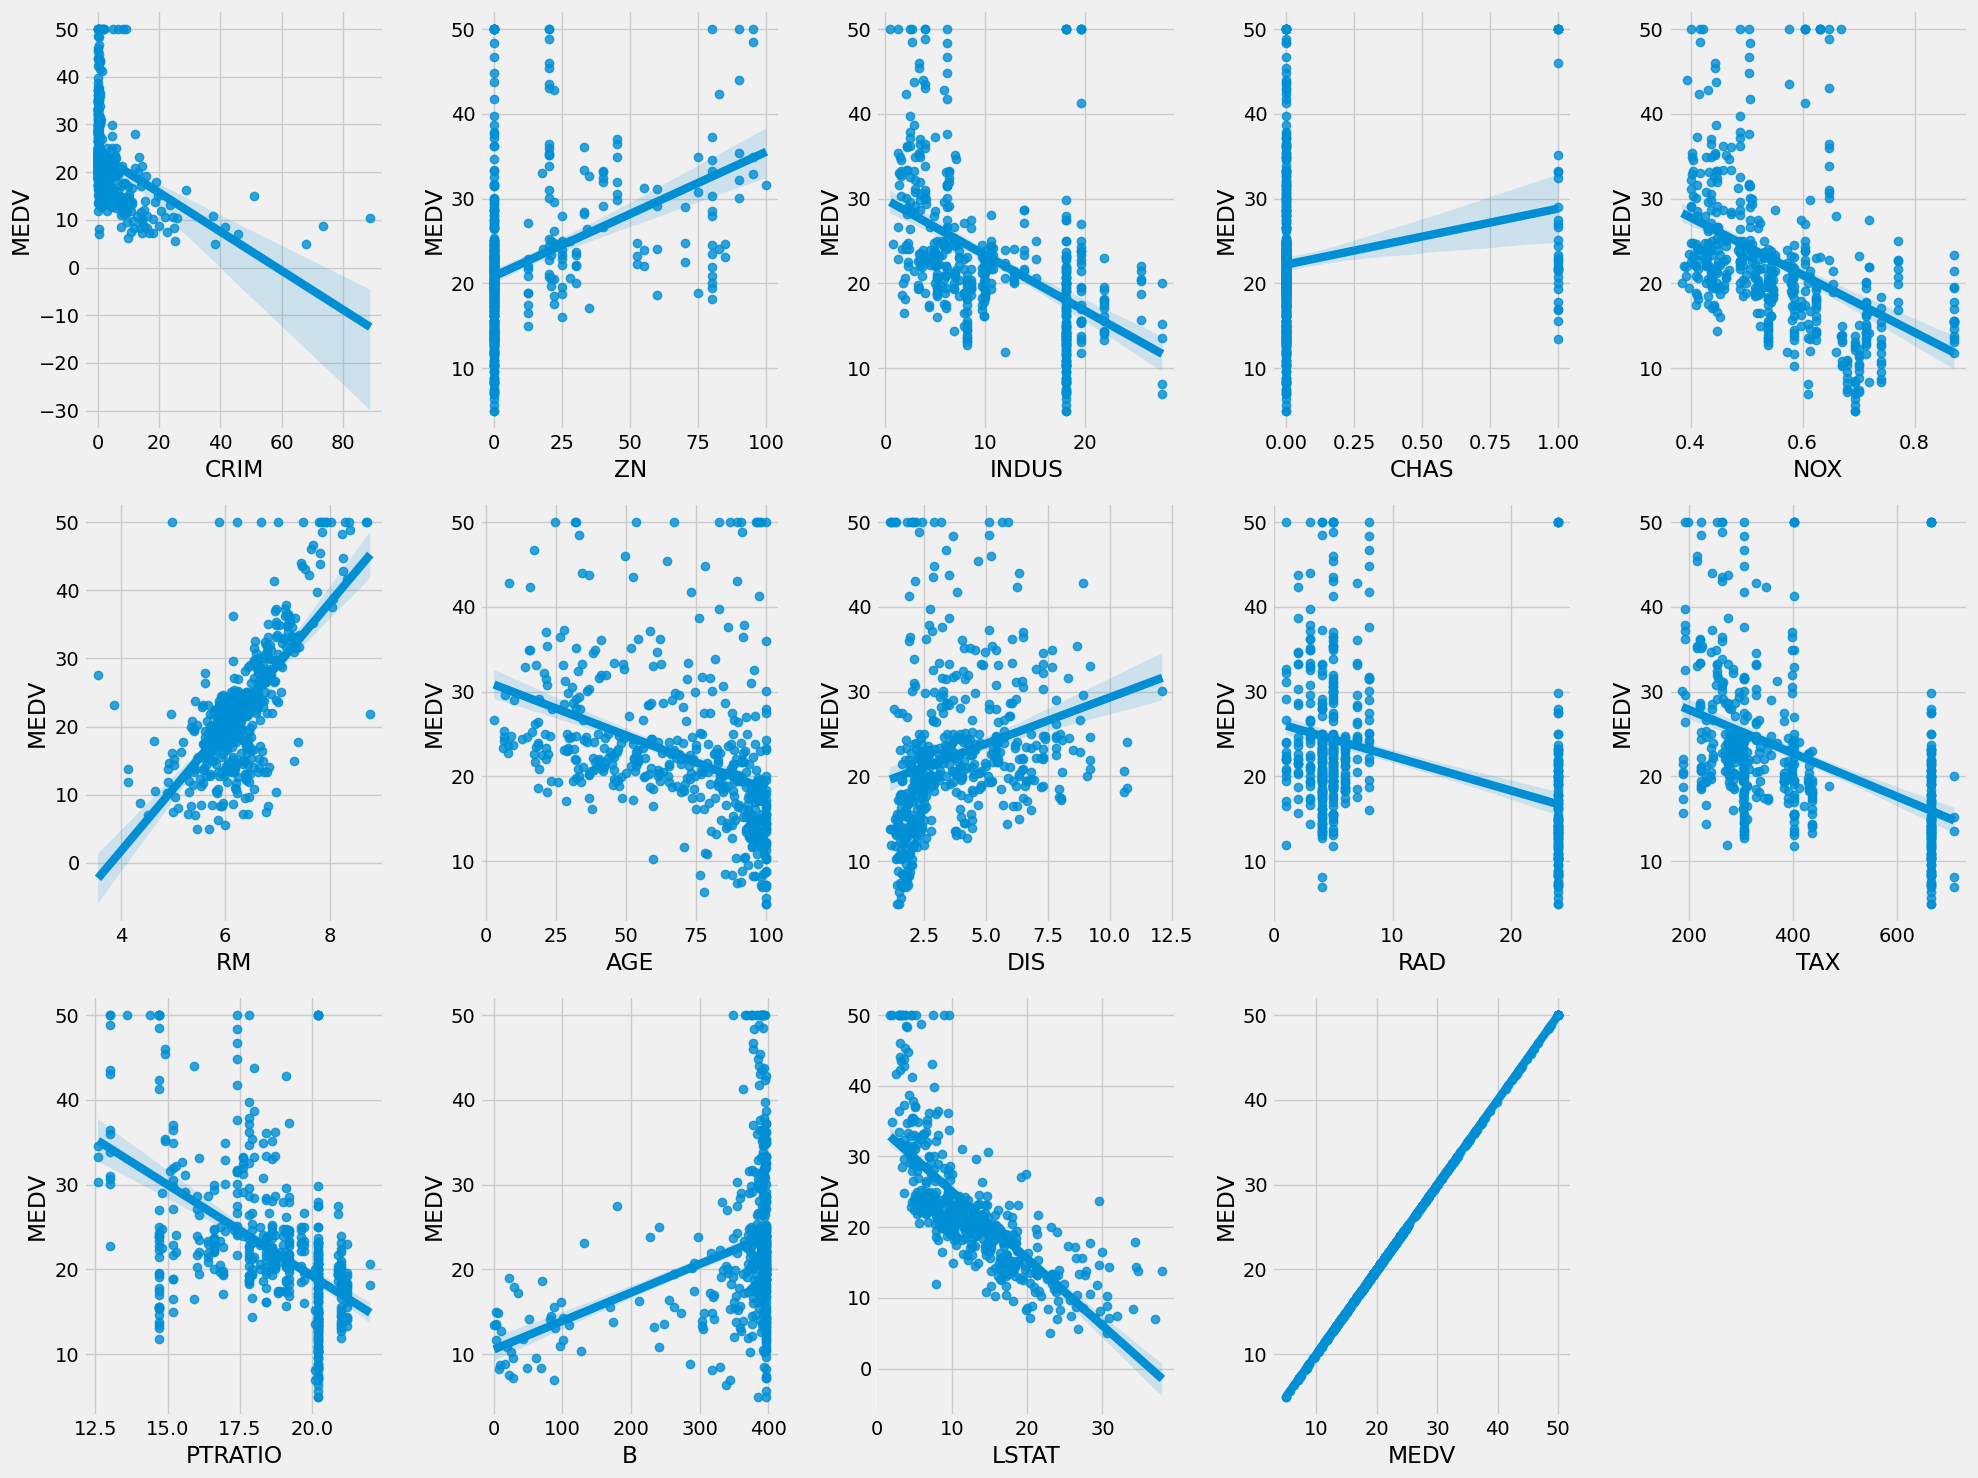

In [39]:
plt.figure(figsize = (20, 15))

for i, column in enumerate(data):
    ax = plt.subplot(3, 5, i + 1)
    sns.regplot(x=data[column], y=data['MEDV'])

plt.tight_layout()
plt.show()

# Data preprocessing

In [ ]:
from sklearn.preprocessing import StandardScaler

def preprocessing(data):
    X = data.iloc[:,:13]
    y = data.iloc[:,13]
    data_clean = data.fillna(data.median())
    data_clean["DIS"] = np.log(data_clean["DIS"])
    scaler = StandardScaler()
    X = scaler.fit_transform(X)
    return X, y

In [52]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(data.iloc[:,:13], data.iloc[:,13], test_size=0.2, random_state=RANDOM_SEED)

# XGBoost

In [53]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score

xgbr = xgb.XGBRegressor(objective='reg:squarederror')
xgbr.fit(X_train,Y_train)
Y_pred = xgbr.predict(X_test)

mse = mean_squared_error(Y_test, Y_pred)
score = r2_score(Y_test,Y_pred)
print("Root Mean Square Error: %.2f" % (mse**(0.5)))
print("R square: {} %".format(round((score*100),2)))

Root Mean Square Error: 2.29
R square: 92.87 %


In [56]:
from sklearn.model_selection import GridSearchCV

params = { 'max_depth': [6, 10],
           'learning_rate': [0.01, 0.08],
           'colsample_bylevel': [0.3, 0.4],
         }

xgbr = xgb.XGBRegressor(seed=RANDOM_SEED)
clf = GridSearchCV(estimator=xgbr, 
                   param_grid=params,
                   scoring='neg_mean_squared_error', 
                   verbose=1)
clf.fit(X_train, Y_train)

print("Best parameters:", clf.best_params_)
print("Lowest RMSE: ", (-clf.best_score_)**(0.5))

Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters: {'colsample_bylevel': 0.3, 'learning_rate': 0.08, 'max_depth': 10}
Lowest RMSE:  3.7001304787485494
